In [6]:
import sys
import os

sys.path.insert(0, os.path.abspath("../src"))

from config import DATA_RAW_PATH, DATA_PROCESSED_PATH, TARGET_COLUMN, RANDOM_STATE
from model import train_decision_tree, train_random_forest

import pandas as pd

df = pd.read_csv(DATA_RAW_PATH)

# -----------------------------
# BASIC CLEANING
# -----------------------------

# Dropped columns that must NOT be used as features
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Filled missing values
df.fillna(0, inplace=True)

# -----------------------------
# ENCODING CATEGORICAL FEATURES
# -----------------------------

categorical_cols = [
    "Gender",
    "Ethnicity",
    "EducationLevel",
    "Smoking",
    "FamilyHistoryAlzheimers",
    "CardiovascularDisease",
    "Diabetes",
    "Depression",
    "HeadInjury",
    "Hypertension"
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# -----------------------------
# SAVED CLEAN DATA
# -----------------------------
df.to_csv(DATA_PROCESSED_PATH, index=False)
print("Processed data saved to:", DATA_PROCESSED_PATH)

# -----------------------------
# TRAINED MODELS
# -----------------------------
dt_model, X_test_dt, y_test_dt, y_pred_dt = train_decision_tree(df)
rf_model, X_test_rf, y_test_rf, y_pred_rf = train_random_forest(df)


Processed data saved to: C:\Users\Admin\PyCharmMiscProject\medical_diagnosis_system\data\processed\alzheimers_clean.csv
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       278
           1       0.86      0.87      0.86       152

    accuracy                           0.90       430
   macro avg       0.89      0.89      0.89       430
weighted avg       0.90      0.90      0.90       430

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== Decision Tree Results ===")
print(classification_report(y_test_dt, y_pred_dt))

print("\n=== Random Forest Results ===")
print(classification_report(y_test_rf, y_pred_rf))



=== Decision Tree Results ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       278
           1       0.86      0.87      0.86       152

    accuracy                           0.90       430
   macro avg       0.89      0.89      0.89       430
weighted avg       0.90      0.90      0.90       430


=== Random Forest Results ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



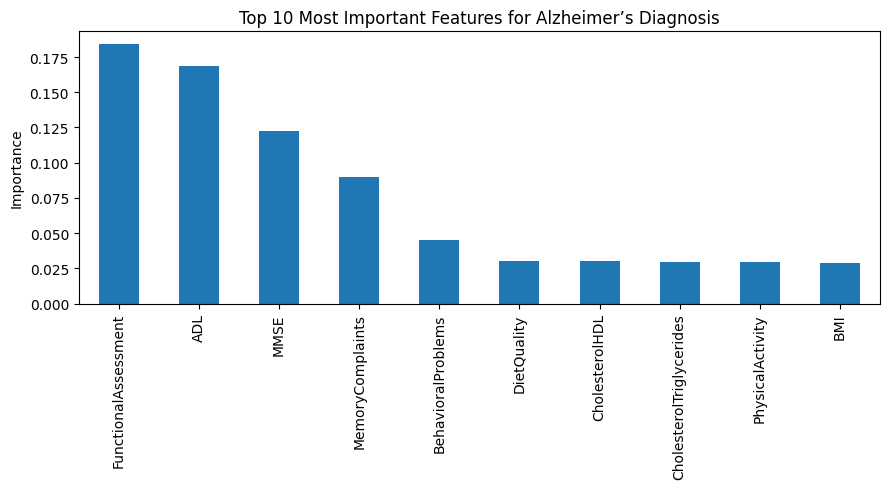

FunctionalAssessment        0.184076
ADL                         0.168848
MMSE                        0.122286
MemoryComplaints            0.089643
BehavioralProblems          0.045324
DietQuality                 0.030515
CholesterolHDL              0.030509
CholesterolTriglycerides    0.029757
PhysicalActivity            0.029406
BMI                         0.028816
dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_test_rf.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False).head(10)

plt.figure(figsize=(9,5))
fi.plot(kind="bar")
plt.title("Top 10 Most Important Features for Alzheimer’s Diagnosis")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print(fi)
